# **Objectives**

The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.

In [7]:
import pandas as pd  #data manipulation
from sklearn.model_selection import train_test_split #train the model on one subset of data and then evaluate its performance on another independent subset.
from sklearn.preprocessing import LabelEncoder # encode categorical labels (textual labels) into numerical values.

In [11]:


from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
df=pd.read_csv('/content/drive/MyDrive/companies.csv')
df.head(10)


,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
5,c:10002,5,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,...,NaN,NaN,NaN,2.0,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19,30.427755,-9.598107,NaN
6,c:10003,6,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20,22.307159,73.181219,NaN
7,c:100042,7,Company,100042,NaN,HostNine,hostnine,/company/hostnine,NaN,operating,...,2011-06-20,2011-06-20,1.0,1.0,NaN,2011-09-07 00:53:17,2011-12-20 09:09:53,NaN,NaN,NaN
8,c:10005,8,Company,10005,NaN,Thomas Publishing,thomas publishing,/company/thomas-publishing,advertising,operating,...,1999-06-01,1999-06-01,1.0,2.0,NaN,2008-08-24 20:21:21,2009-11-19 17:21:00,40.712775,-74.005973,NaN
9,c:100062,9,Company,100062,NaN,Vetter Idea Management System,vetter idea management system,/company/vetter-idea-management-system,enterprise,operating,...,2011-08-01,2011-08-01,1.0,2.0,dmurtagh,2011-09-07 01:04:56,2011-09-24 13:13:18,NaN,NaN,NaN


DATA EXPLORATION

Data exploration is the initial step in the data analysis process where you aim to understand the main characteristics of your dataset. The primary goal is to summarize its main features, often with the help of statistical graphics and other data visualization methods.

In [21]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  log

In [22]:
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
        Unnamed: 0.1      entity_id  parent_id     logo_width    logo_height  \
count  196553.000000  196553.000000        0.0  110110.000000  110110.000000   
mean    98276.000000  153006.227333        NaN     459.132685     222.728917   
std     56740.108067   90209.250941        NaN     594.982577     333.090722   
min         0.000000       1.000000        NaN       1.000000       1.000000   
25%     49138.000000   59850.000000        NaN     192.000000      70.000000   
50%     98276.000000  174539.000000        NaN     267.000000     105.000000   
75%    147414.000000  232655.000000        NaN     484.000000     232.000000   
max    196552.000000  286215.000000        NaN   18200.000000    9600.000000   

       investment_rounds  invested_companies  funding_rounds  \
count        2591.000000         2591.000000    31707.000000   
mean            2.372057            2.204940        1.659760   
std            12.173510           11.436955        1.201666   
m

In [23]:
df.shape

(196553, 44)

DATA CLEANING

Data cleansing, is the process of fixing incorrect, incomplete, duplicate data in a data set. It involves identifying data errors and then changing, updating or removing data to correct them. Data cleansing improves data quality and helps provide more accurate, consistent and reliable information for decision-making in an organization.

In [24]:
columns_to_drop = ['Unnamed: 0.1', 'permalink', 'normalized_name','short_description']
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(196553, 40)

In [26]:
df.fillna(0, inplace=True)

In [27]:
date_columns = ['founded_at' ,'twitter_username','closed_at', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'created_at', 'updated_at']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   196553 non-null  object        
 1   entity_type          196553 non-null  object        
 2   entity_id            196553 non-null  int64         
 3   parent_id            196553 non-null  float64       
 4   name                 196553 non-null  object        
 5   category_code        196553 non-null  object        
 6   status               196553 non-null  object        
 7   founded_at           91227 non-null   datetime64[ns]
 8   closed_at            2620 non-null    datetime64[ns]
 9   domain               196553 non-null  object        
 10  homepage_url         196553 non-null  object        
 11  twitter_username     1 non-null       datetime64[ns]
 12  logo_url             196553 non-null  object        
 13  logo_width    

In [28]:
current_year = pd.to_datetime('today').year
df['company_age'] = current_year - df['founded_at'].dt.year
df['company_age']

0         19.0
1          NaN
2          NaN
3         16.0
4         16.0
          ... 
196548    17.0
196549    17.0
196550    65.0
196551    16.0
196552    17.0
Name: company_age, Length: 196553, dtype: float64

In [29]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages)

id                      0.000000
entity_type             0.000000
entity_id               0.000000
parent_id               0.000000
name                    0.000000
category_code           0.000000
status                  0.000000
founded_at             53.586564
closed_at              98.667026
domain                  0.000000
homepage_url            0.000000
twitter_username       99.999491
logo_url                0.000000
logo_width              0.000000
logo_height             0.000000
description             0.000000
overview                0.000000
tag_list                0.000000
country_code            0.000000
state_code              0.000000
city                    0.000000
region                  0.000000
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds       0.000000
invested_companies      0.000000
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds          0.000000
funding_total_usd       0.000000
first_mile

In [30]:
df.drop_duplicates(inplace=True)

In [31]:

# Dropping columns with NaN values
threshold = 0.9
columns_to_drop = df.columns[df.isnull().mean() > threshold]
df.drop(columns=columns_to_drop, inplace=True)

In [32]:
df['founded_at']

0        2005-10-17
1               NaT
2               NaT
3        2008-07-26
4        2008-07-26
            ...    
196548   2007-01-01
196549   2007-11-01
196550   1959-01-01
196551   2008-07-01
196552   2007-09-01
Name: founded_at, Length: 196553, dtype: datetime64[ns]

In [33]:
df = df[~df['status'].isin(['corrupted_value'])]

In [34]:
df.dropna(subset=['founded_at'], inplace=True)

In [35]:
df['first_milestone_at']

0        2010-09-05
3               NaT
4               NaT
5               NaT
6               NaT
            ...    
196548   2013-08-12
196549   2013-05-01
196550   2012-01-01
196551          NaT
196552   2006-07-01
Name: first_milestone_at, Length: 91227, dtype: datetime64[ns]

In [36]:
median_date = df['first_milestone_at'].dropna().median()
df['first_milestone_at'].fillna(median_date, inplace=True)


df.isnull().sum()

id                        0
entity_type               0
entity_id                 0
parent_id                 0
name                      0
category_code             0
status                    0
founded_at                0
domain                    0
homepage_url              0
logo_url                  0
logo_width                0
logo_height               0
description               0
overview                  0
tag_list                  0
country_code              0
state_code                0
city                      0
region                    0
investment_rounds         0
invested_companies        0
first_funding_at      66926
last_funding_at       66926
funding_rounds            0
funding_total_usd         0
first_milestone_at        0
last_milestone_at     47741
milestones                0
relationships             0
created_by                0
created_at                0
updated_at                0
lat                       0
lng                       0
ROI                 

In [37]:
label_encoder = LabelEncoder()
df['encoded_column'] = label_encoder.fit_transform(df['status'])

In [38]:

from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['status'])

# Display the mapping between original values and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}


In [39]:
label_mapping = {'acquired': 0, 'closed': 1, 'ipo': 2, 'operating': 3}
df['label'] = df['status'].map(label_mapping)
df['label']

0         3
3         3
4         3
5         3
6         3
         ..
196548    3
196549    3
196550    3
196551    3
196552    3
Name: label, Length: 91227, dtype: int64

In [40]:
aggregated_group = df.groupby('status')[['milestones', 'relationships']].mean()
print(aggregated_group)

           milestones  relationships
status                              
acquired     1.129641       5.298301
closed       0.855696       2.571646
ipo          1.934579      32.415888
operating    0.608447       2.251768


In [41]:
pivot_table = df.pivot_table(index='status', columns='category_code', values='investment_rounds', aggfunc='mean')
print(pivot_table)


category_code         0  advertising  analytics  automotive   biotech  \
status                                                                  
acquired       0.007921     0.025316   0.000000         0.0  0.024000   
closed         0.000000     0.000000   0.000000         0.0  0.000000   
ipo            0.235294     0.250000   0.000000         0.0  0.670000   
operating      0.093604     0.007750   0.002481         0.0  0.022442   

category_code  cleantech  consulting  design  ecommerce  education  ...  \
status                                                              ...   
acquired        0.000000    0.026667     0.0   0.053763   0.000000  ...   
closed          0.000000    0.038462     0.0   0.000000   0.000000  ...   
ipo             0.407407    0.230769     NaN   1.571429   0.000000  ...   
operating       0.016489    0.027815     0.0   0.003705   0.003233  ...   

category_code  real_estate    search  security  semiconductor    social  \
status                             

In [42]:
avg_software_for_ipo = pivot_table.loc['ipo', 'software']
print("Average value of software for IPO companies:", avg_software_for_ipo)

Average value of software for IPO companies: 1.043956043956044


In [43]:

total_avg_value_operating = pivot_table.loc['operating'].mean()
print("Total average value of all categories for operating companies:", total_avg_value_operating)

Total average value of all categories for operating companies: 0.05429280931709659


In [44]:

total_companies_software = pivot_table['software'].sum()
print("Total number of companies in the 'software' category:", total_companies_software)

Total number of companies in the 'software' category: 1.0770485904638893


EXPLORATORY DATA ANALYSIS(EDA)

Exploratory Data Analysis, is an approach to analyzing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. The primary goal of EDA is to uncover patterns, relationships, anomalies, and insights within the data, helping analysts make sense of the information and generate hypotheses for further investigation.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

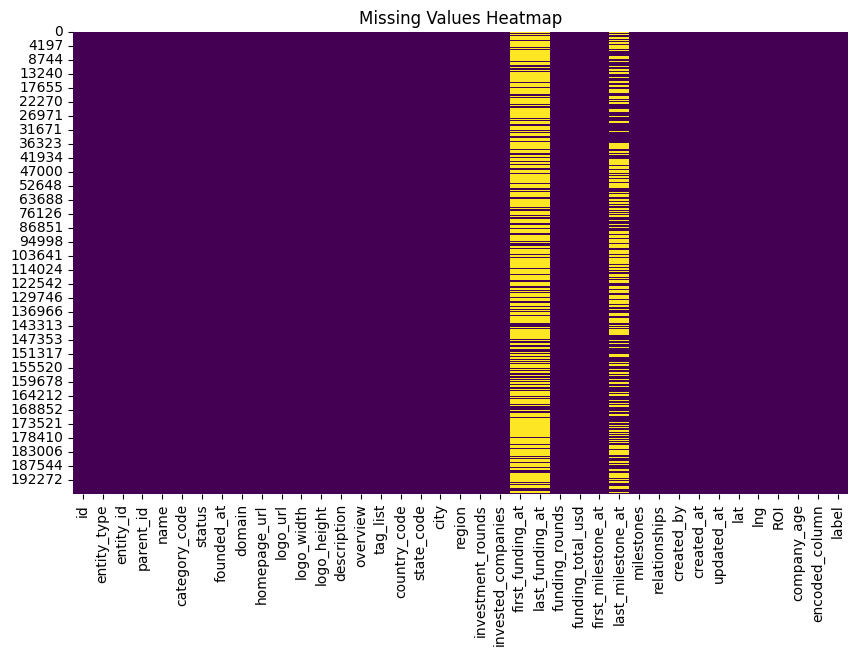

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

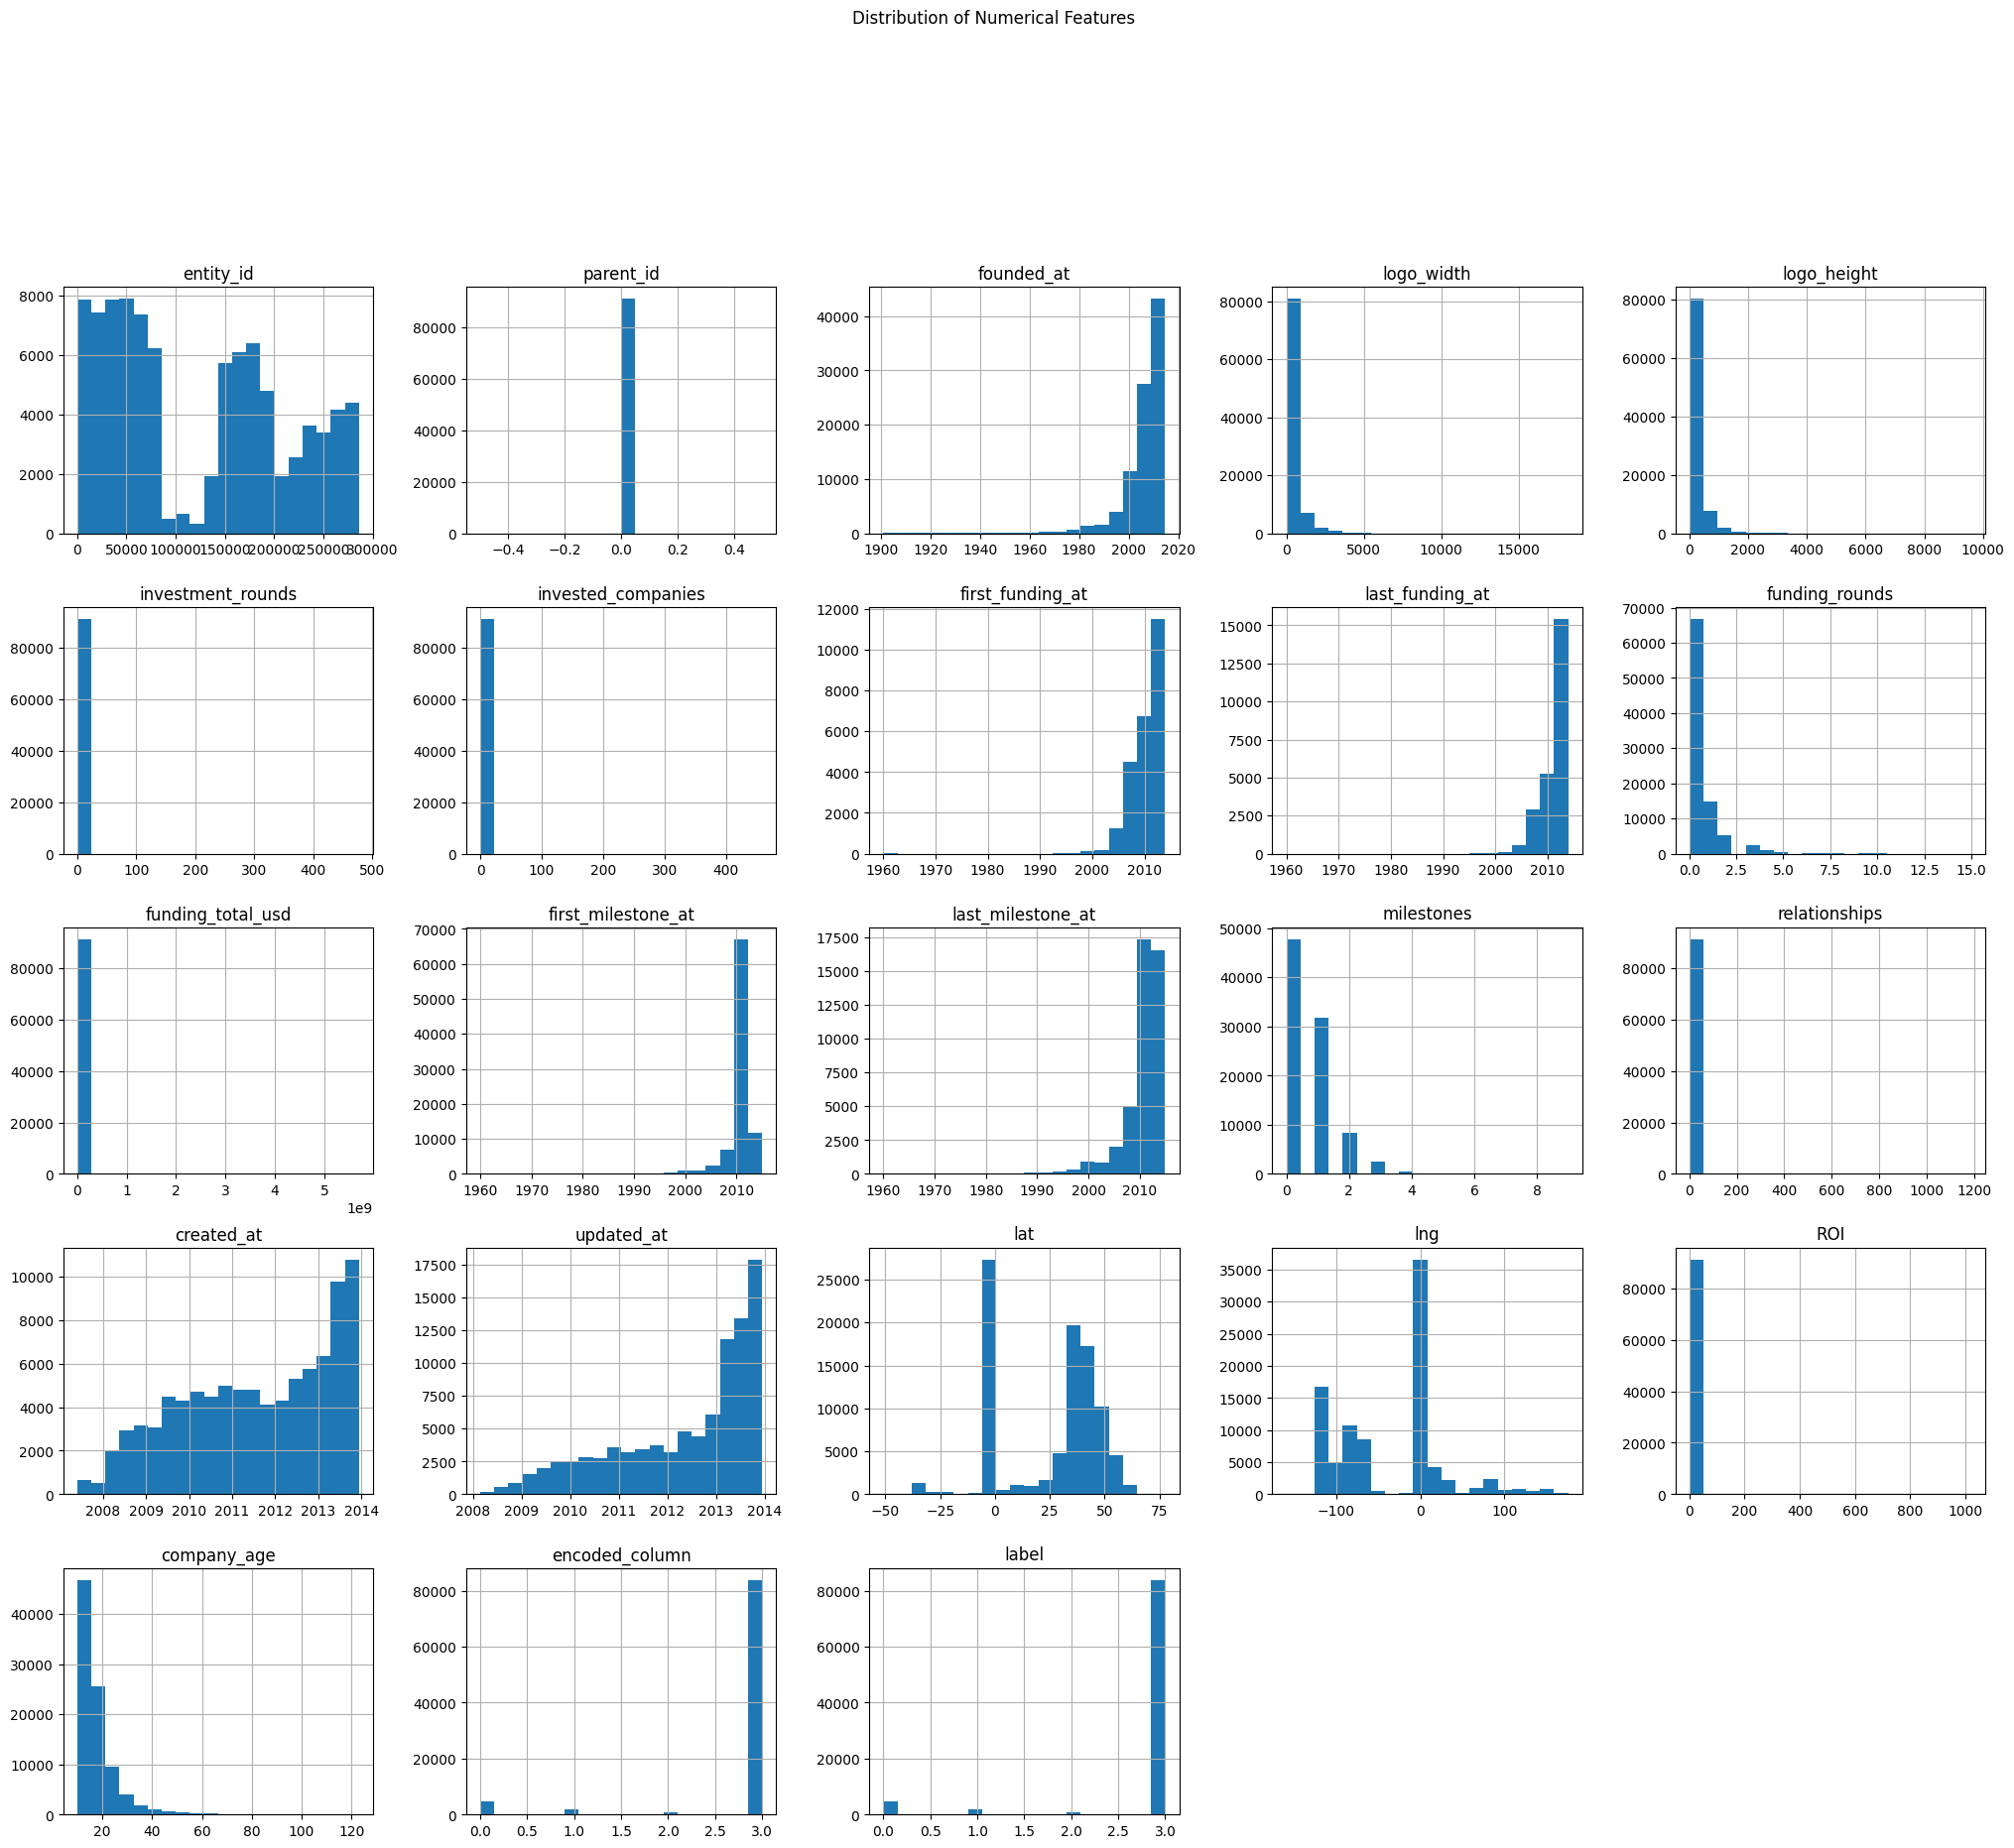

In [47]:
df.hist(figsize=(25,20), bins=20)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()


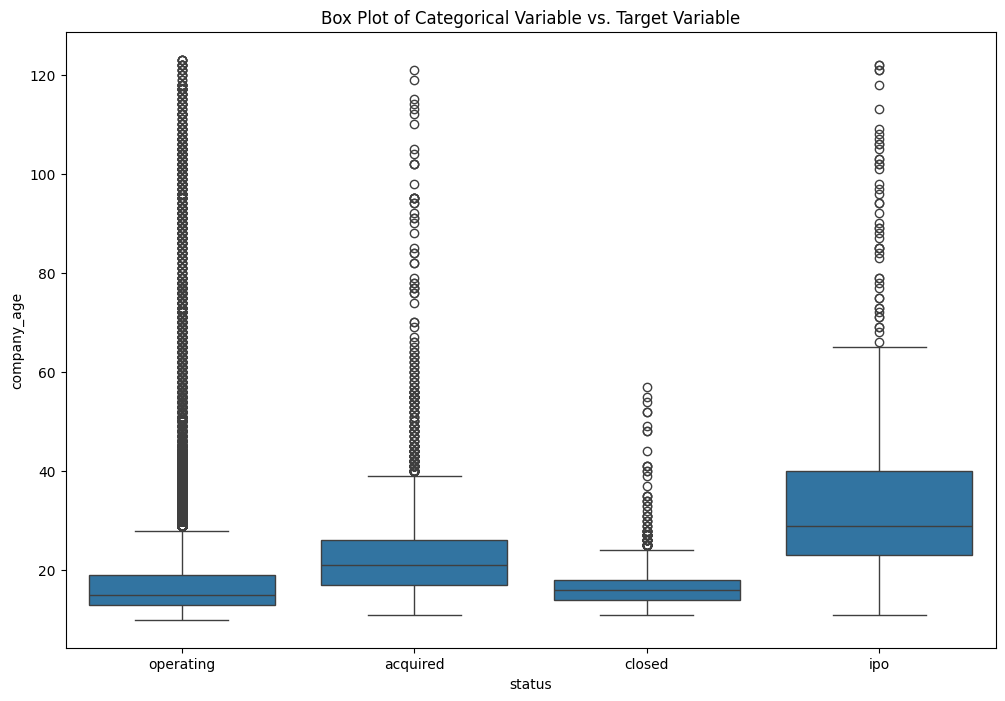

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='status', y='company_age', data=df)
plt.title('Box Plot of Categorical Variable vs. Target Variable')
plt.show()

UNIVARIATE ANALYSIS

Univariate analysis involves the exploration and analysis of a single variable, focusing on its distribution, summary statistics, and visual representations. The primary goal is to understand the characteristics of the variable in isolation.

In [50]:
df.describe()

,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI,company_age,encoded_column,label
count,91227.000000,91227.0,91227.000000,91227.000000,91227.000000,91227.000000,91227.000000,9.122700e+04,91227.000000,91227.000000,91227.000000,91227.000000,91227.000000,91227.000000,91227.000000,91227.000000
mean,123011.106197,0.0,434.795620,211.510693,0.042411,0.038947,0.473500,3.627536e+06,0.650367,2.630164,26.203381,-35.742529,0.090005,18.279435,2.792901,2.792901
std,88551.607355,0.0,621.799885,340.971292,2.074815,1.949319,1.026616,3.395134e+07,0.834140,9.936373,21.589580,63.574197,4.168227,9.828483,0.721830,0.721830
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-50.942326,-159.485278,0.000000,10.000000,0.000000,0.000000
25%,42249.000000,0.0,160.000000,58.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-87.953553,0.000000,13.000000,3.000000,3.000000
50%,105499.000000,0.0,250.000000,99.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,35.282752,-0.127758,0.000000,15.000000,3.000000,3.000000
75%,191129.500000,0.0,480.000000,225.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,3.000000,41.763711,0.000000,0.000000,20.000000,3.000000,3.000000
max,286200.000000,0.0,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130,1020.833333,123.000000,3.000000,3.000000


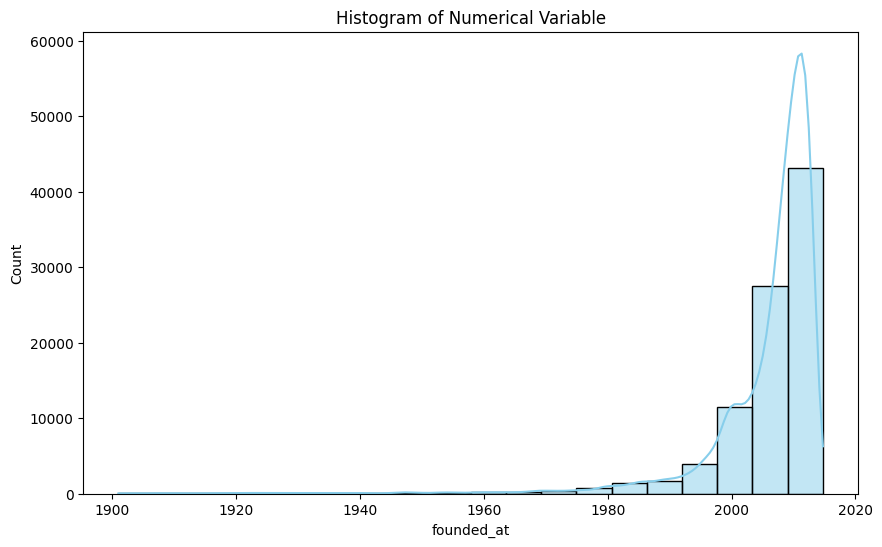

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['founded_at'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Numerical Variable')
plt.show()

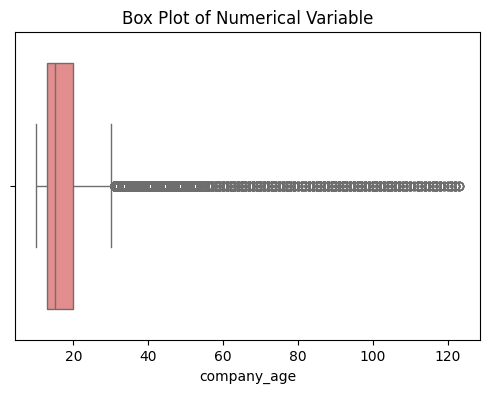

In [52]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['company_age'], color='lightcoral')
plt.title('Box Plot of Numerical Variable')
plt.show()

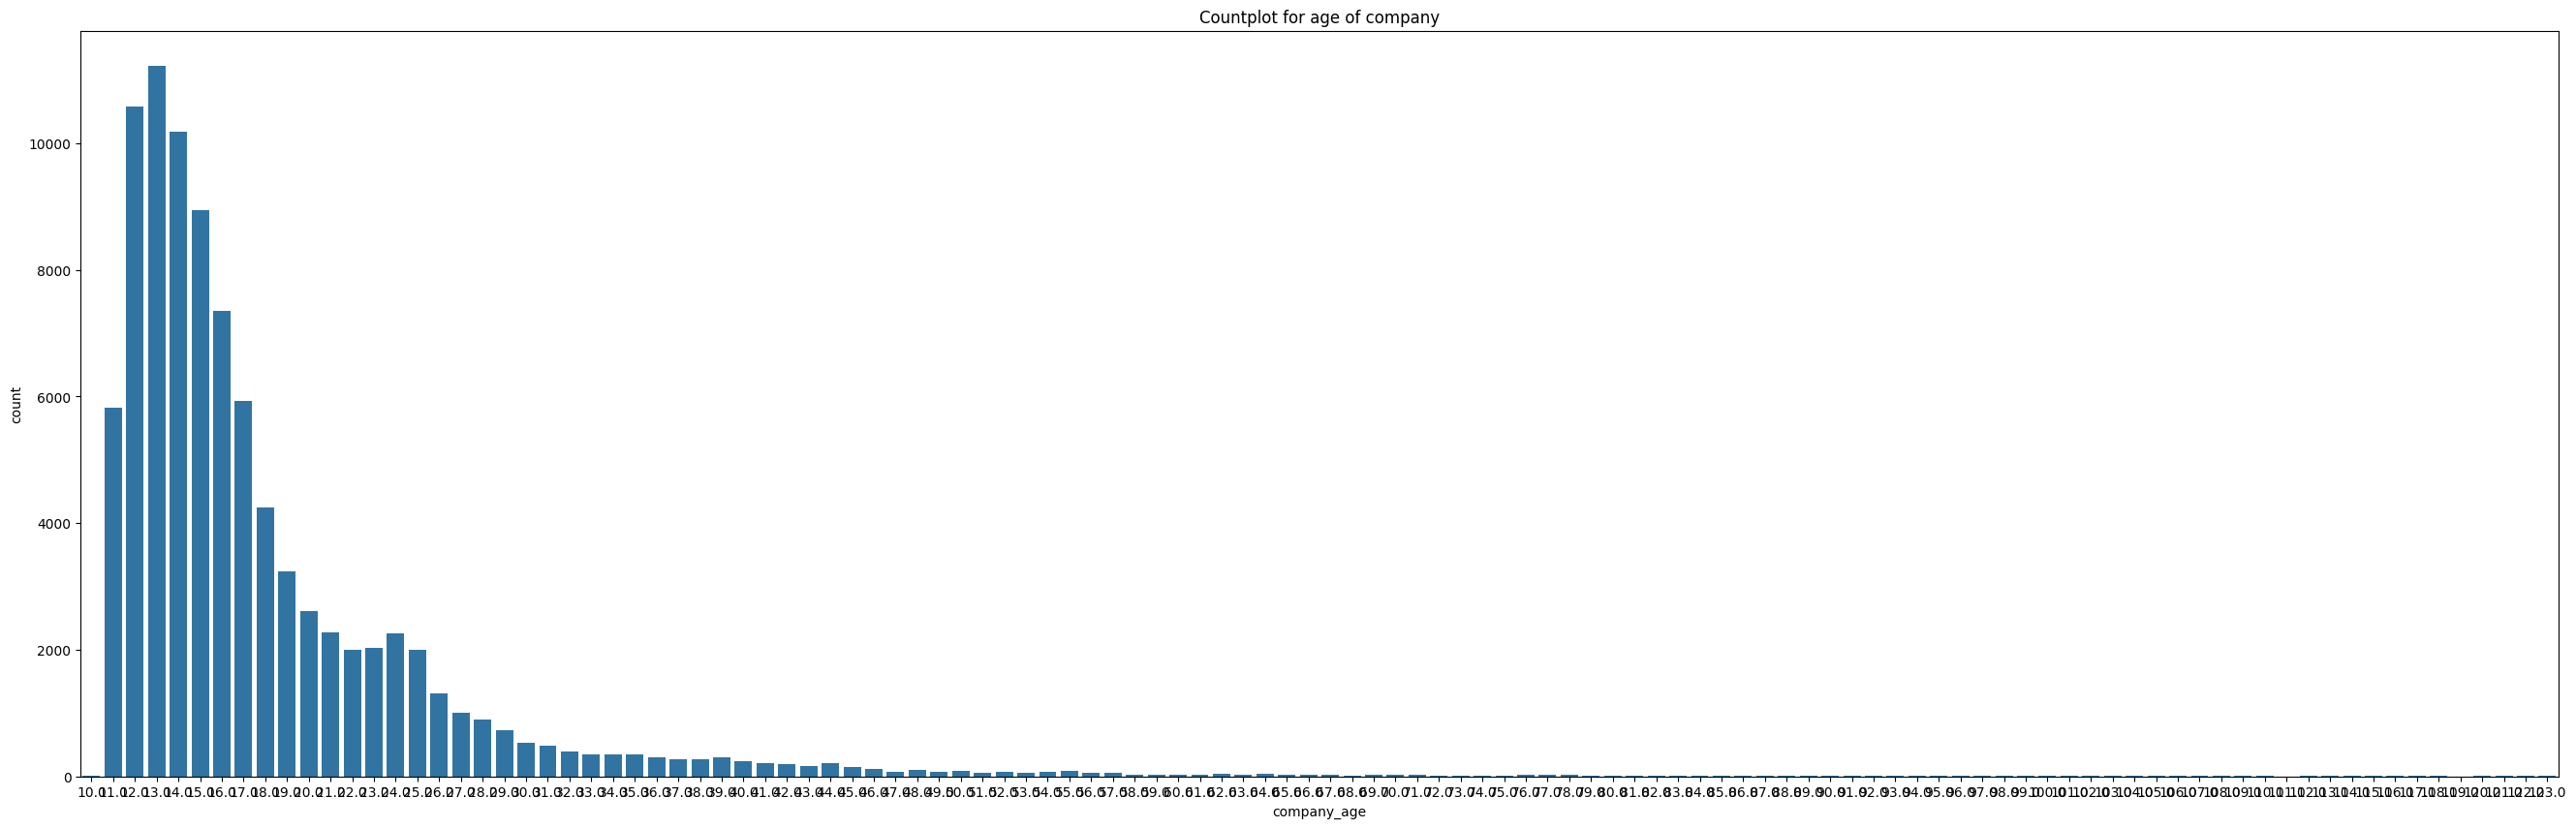

In [53]:
plt.figure(figsize=(33, 10))
sns.countplot(x='company_age', data=df)
plt.title('Countplot for age of company')
plt.show()

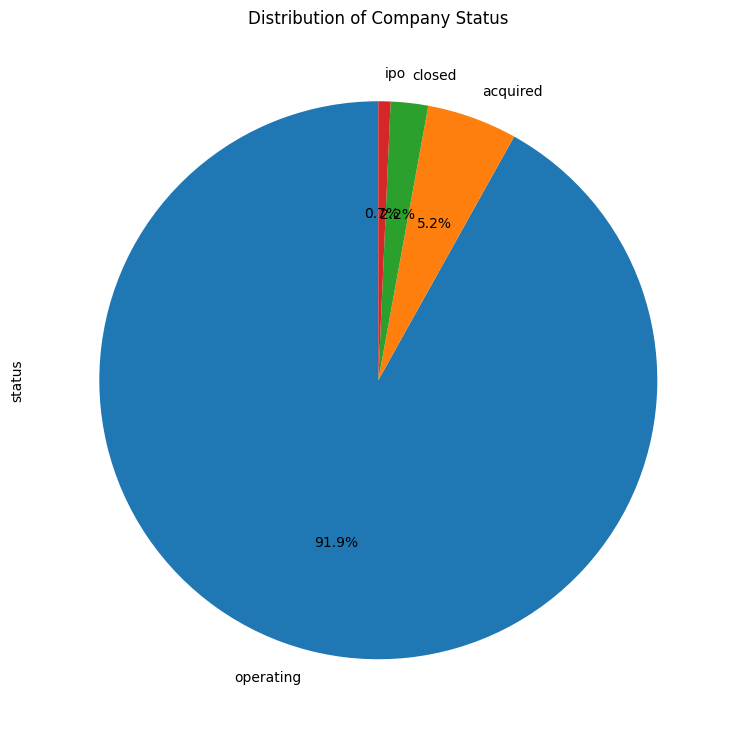

In [54]:
plt.figure(figsize=(9, 10))
df['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Company Status')
plt.show()

<ipython-input-55-b81cc06e589a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['company_age'], shade=True, color='salmon')


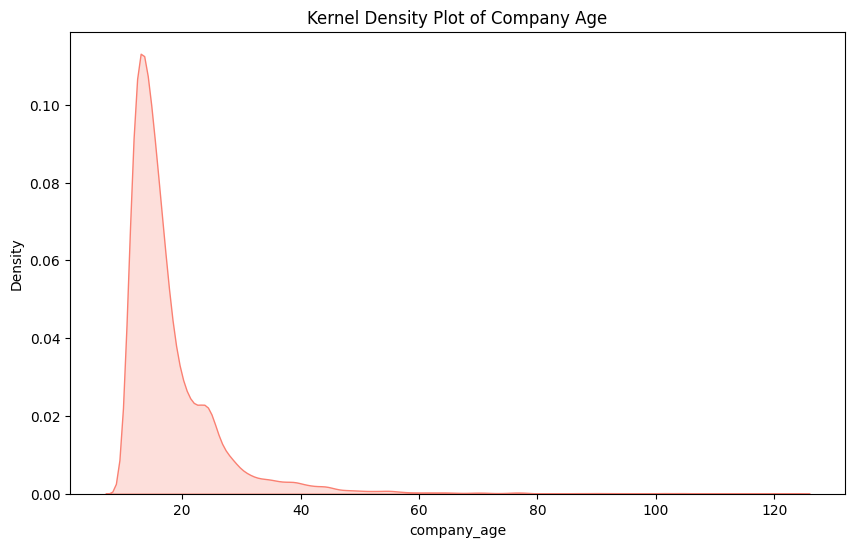

In [55]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['company_age'], shade=True, color='salmon')
plt.title('Kernel Density Plot of Company Age')
plt.show()

<ipython-input-56-7c54ed076a6f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category_code', y='label', data=df, hue='status', ci=None)


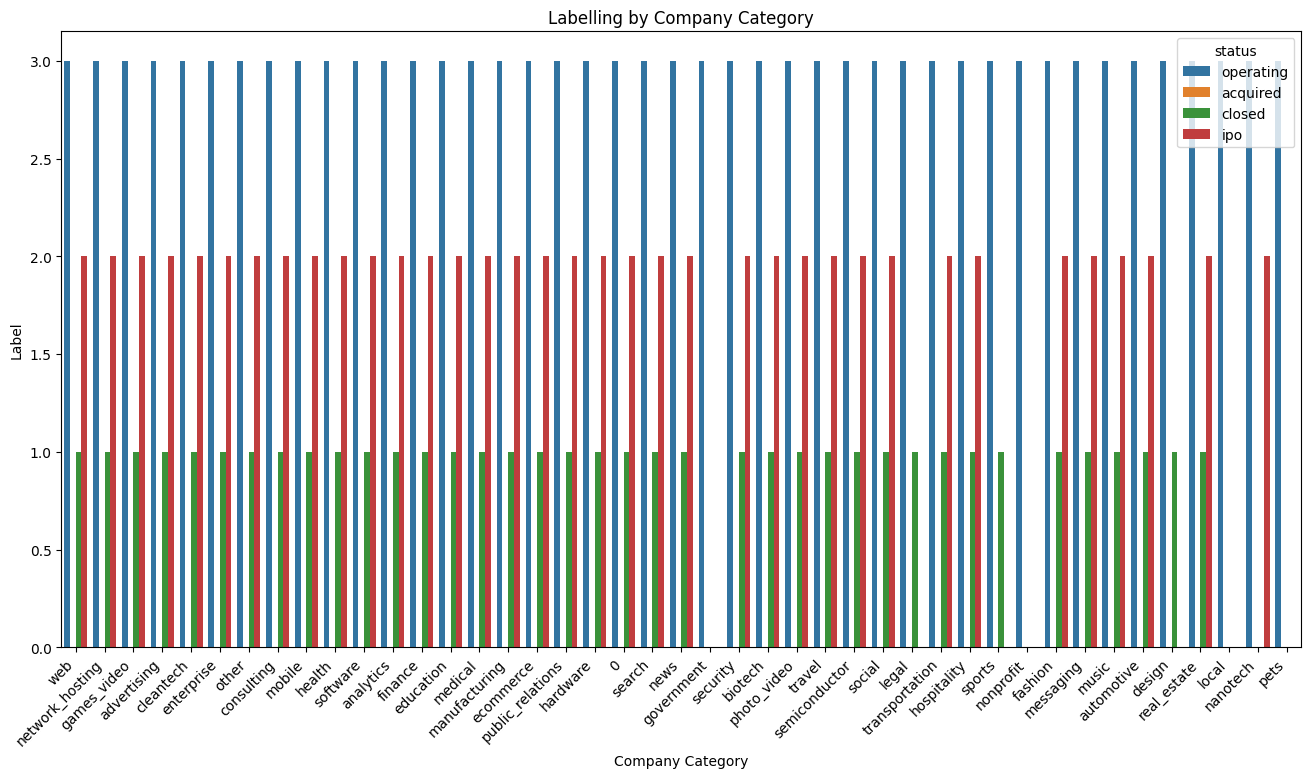

In [56]:
plt.figure(figsize=(16, 8))
sns.barplot(x='category_code', y='label', data=df, hue='status', ci=None)
plt.title('Labelling by Company Category')
plt.xlabel('Company Category')
plt.ylabel('Label')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-57-93204daacf66>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lat'], label='Latitude', shade=True)
<ipython-input-57-93204daacf66>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lng'], label='Longitude', shade=True)


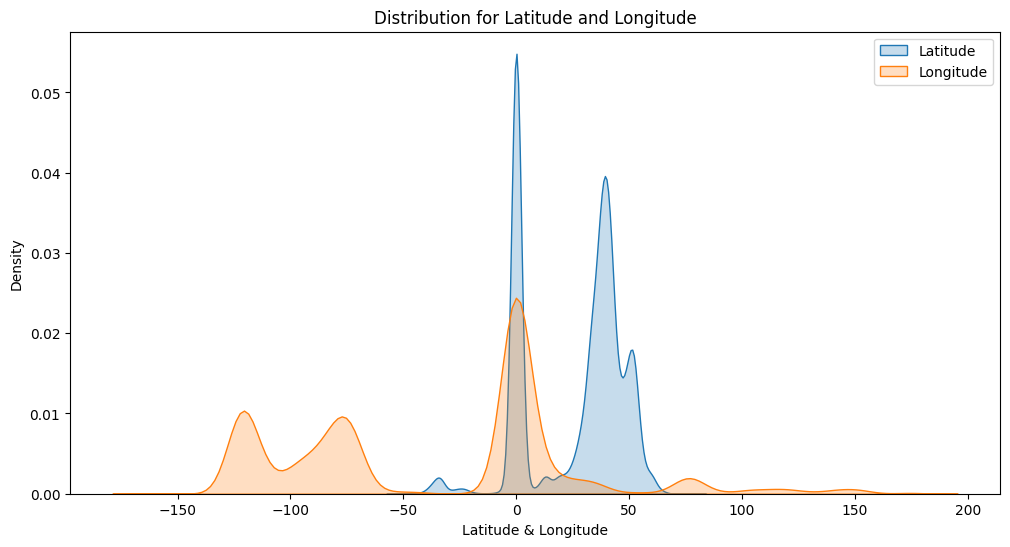

In [57]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['lat'], label='Latitude', shade=True)
sns.kdeplot(df['lng'], label='Longitude', shade=True)
plt.title('Distribution for Latitude and Longitude')
plt.xlabel('Latitude & Longitude')
plt.ylabel('Density')
plt.legend()
plt.show()

MULTIVARIATE ANALYSIS

Multivariate analysis is a statistical technique that involves the simultaneous analysis of multiple variables to understand the relationships and patterns within a dataset. This type of analysis is particularly useful when dealing with complex datasets where several variables may influence each other.

<ipython-input-58-d58e4f39cc15>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


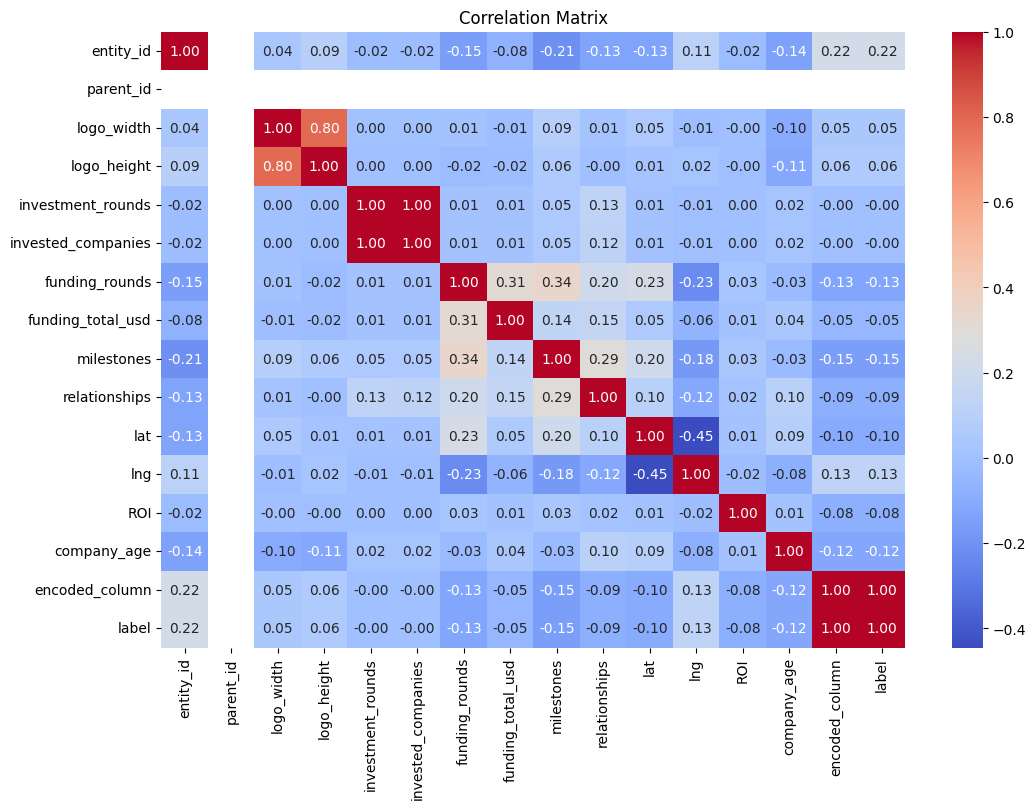

In [58]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

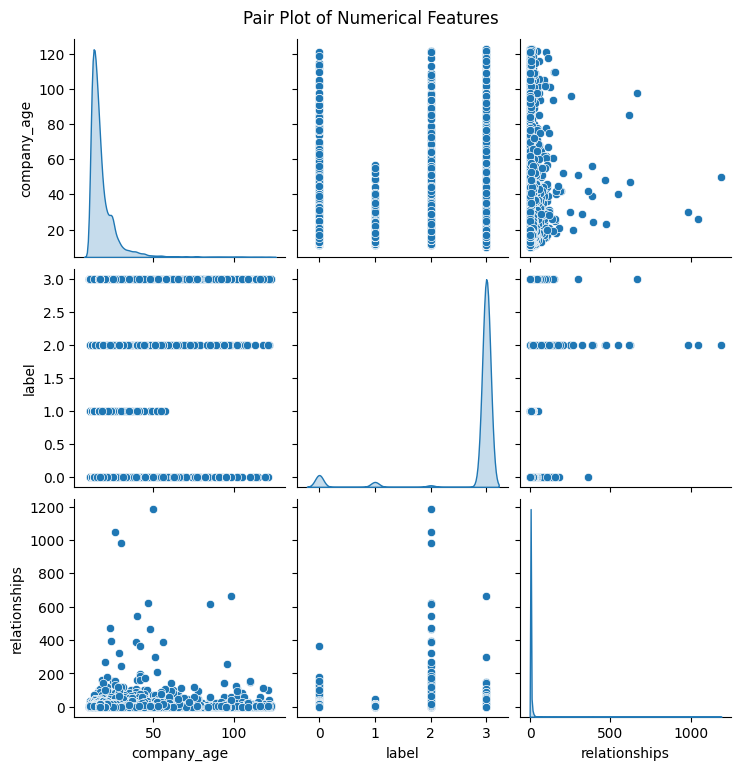

In [59]:
numerical_features = ['company_age', 'label', 'relationships']
sns.pairplot(df[numerical_features], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

<ipython-input-60-c564bc9da5e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='company_age', y='label', data=df, palette='pastel')


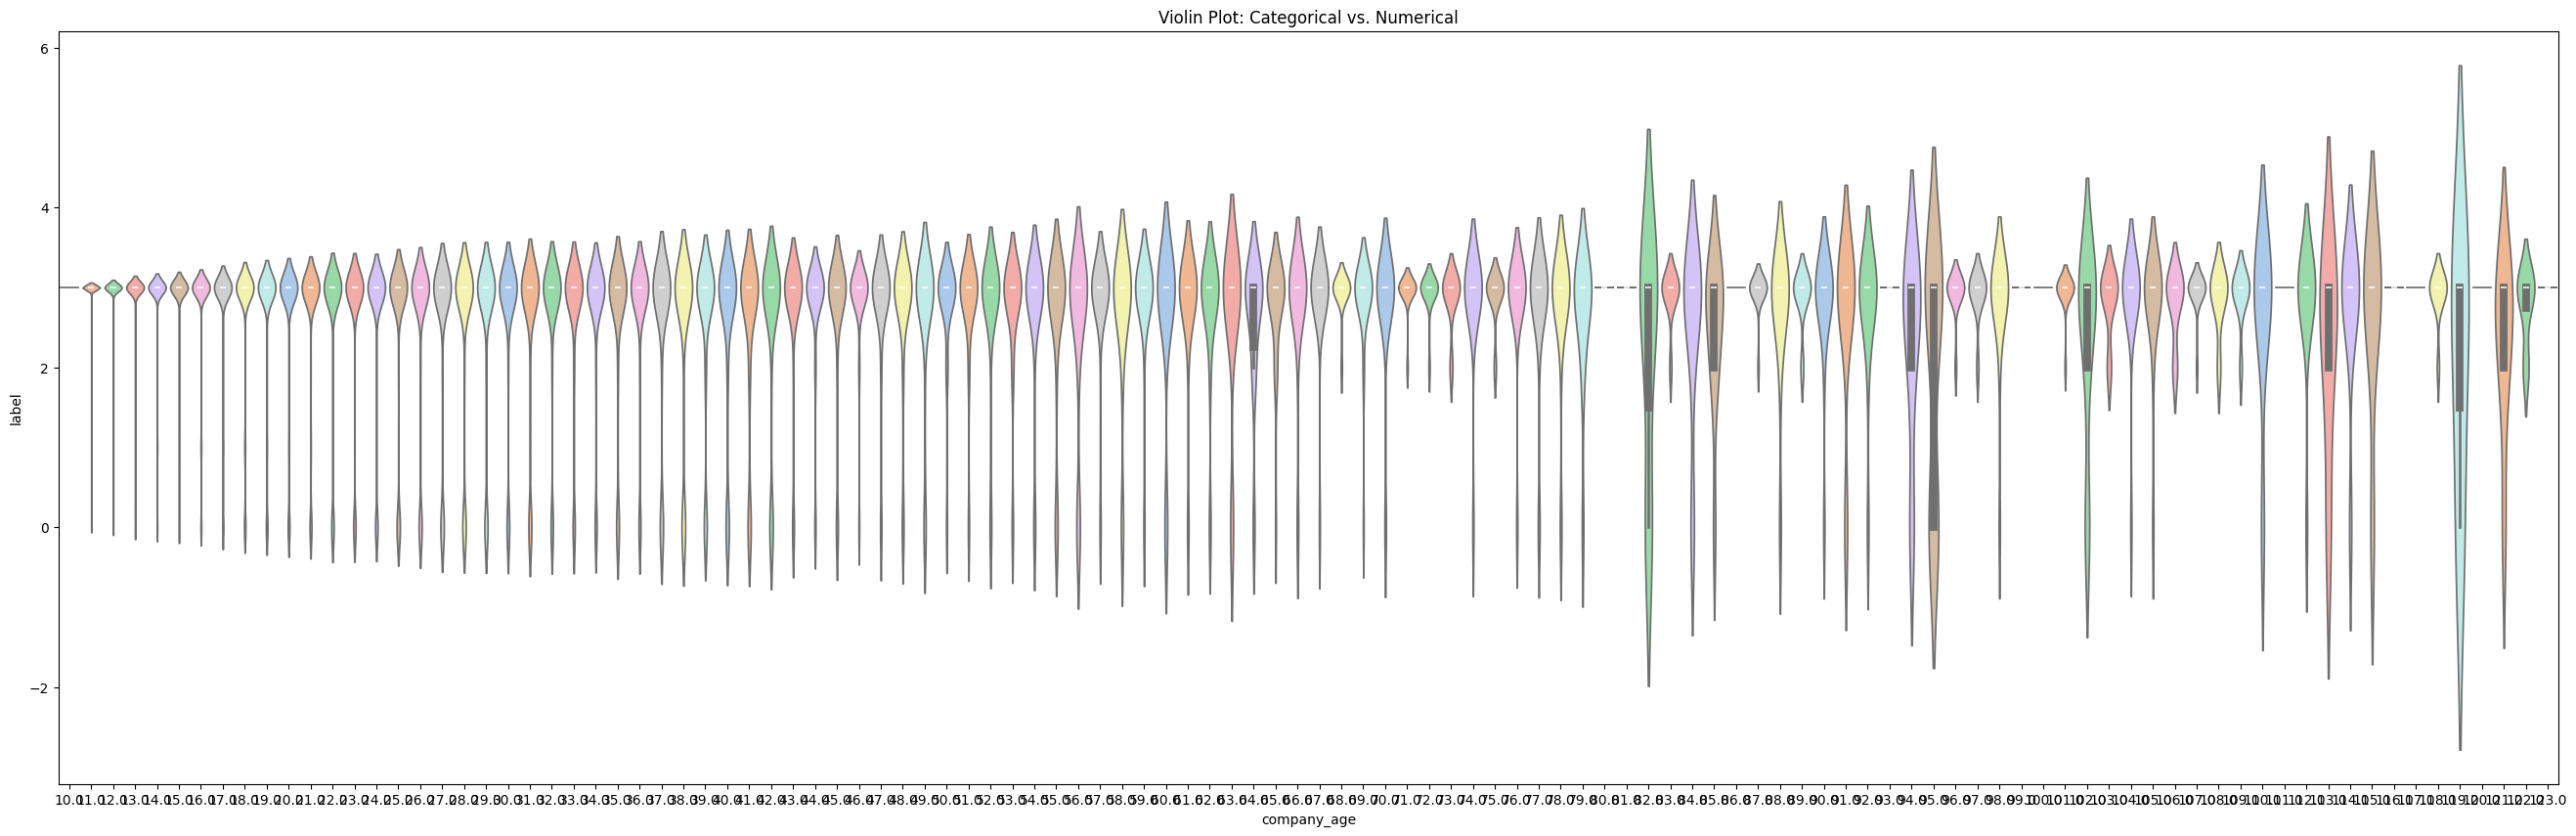

In [60]:
plt.figure(figsize=(33, 10))
sns.violinplot(x='company_age', y='label', data=df, palette='pastel')
plt.title('Violin Plot: Categorical vs. Numerical')
plt.show()